In [3]:
import pandas as pd 
import numpy as np
from numpy.random import default_rng

In [4]:
def OU_lastcol(M=100000, N=250, T=25, sigma=.1, mu=1, lambda_est=1, S0=1):     
    dt = T/N     
    c = (1-lambda_est*dt)
    cv = c**np.arange(N)[::-1]

    R = np.random.normal(lambda_est*mu*dt, sigma, (M,N))

    SN = np.dot(R, cv) + S0*c**N
    
    # SN = np.multiply(R.T, cv[:, np.newaxis]) + S0*c**N
    # SN =  + S0*c**N 
    df = pd.DataFrame(SN)     
    return df

In [5]:
%%timeit
OU_lastcol()

598 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
import numpy as np
import pandas as pd

In [1]:
%load_ext autoreload
%autoreload 2
import risktools as rt

In [2]:
%%timeit
rt.simOU(dt=1/252, T=10, sims=10000, c=True)

Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
519 ms ± 6.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
rt.simOU(dt=1/252, T=10, sims=10000, c=False)

Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
1.82 s ± 47.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Half-life of theta in days =  87.3365447505531


<AxesSubplot: >

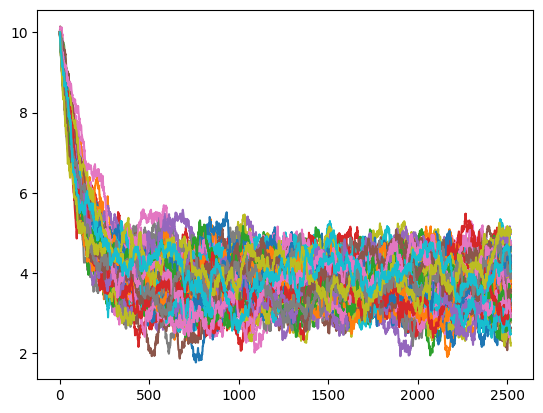

In [5]:
rt.simOU(s0=10, dt=1/252, T=10, sims=10000, c=True).iloc[:,:100].plot(legend=False)

In [11]:
np.random.seed(123)

In [7]:
mu = np.ones(15*252+1)*3

In [8]:
mu[100:] = 6

In [10]:
np.random.seed(123)
sims = rt.simOU(s0=5, theta=20, mu=mu, dt=1/252, sigma=1, T=15, sims=10000)#.iloc[:,:100].plot(legend=False)

Half-life of theta in days =  8.73365447505531


<AxesSubplot: >

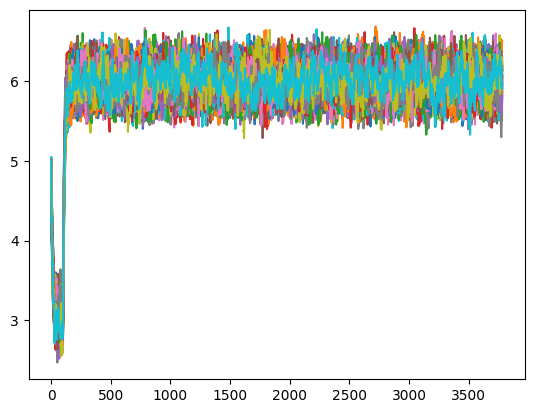

In [11]:
sims.iloc[:,:100].plot(legend=False)

In [21]:
%%timeit
rt.simOU(dt=1/252, T=10, sims=10000, c=True)

: 

: 

In [18]:
%%timeit
rt.simOU(dt=1/252, T=10, sims=10000, c=False)

Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
Half-life of theta in days =  87.3365447505531
1.66 s ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
!pip install cython

  Using cached Cython-0.29.32-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)


In [6]:
import cython

In [7]:
def primes(nb_primes: cython.int):
    i: cython.int
    p: cython.int[1000]

    if nb_primes > 1000:
        nb_primes = 1000

    if not cython.compiled:  # Only if regular Python is running
        p = [0] * 1000       # Make p work almost like a C array

    len_p: cython.int = 0  # The current number of elements in p.
    n: cython.int = 2
    while len_p < nb_primes:
        # Is n prime?
        for i in p[:len_p]:
            if n % i == 0:
                break

        # If no break occurred in the loop, we have a prime.
        else:
            p[len_p] = n
            len_p += 1
        n += 1

    # Let's copy the result into a Python list:
    result_as_list = [prime for prime in p[:len_p]]
    return result_as_list

In [15]:
primes(5000000000);

In [16]:
cimport numpy as np

SyntaxError: invalid syntax (1481305842.py, line 1)

In [ ]:
import pandas as _pd
import numpy as _np

def _simOUpy(s0=5, mu=4, theta=2, sigma=1, T=1, dt=1 / 252, sims=1000, eps=None):
    # number of business days in a year
    bdays_in_year = 252

    # number of periods dt in T
    periods = int(T / dt)

    if isinstance(mu, list):
        assert len(mu) == (
            periods
        ), "Time dependent mu used, but the length of mu is not equal to the number of periods calculated."

    # init df with zeros, rows are steps forward in time, columns are simulations
    out = _np.zeros((periods + 1, sims))
    out = _pd.DataFrame(data=out)

    # set first row as starting value of sim
    out.loc[0, :] = s0

    # print half-life of theta
    print("Half-life of theta in days = ", _np.log(2) / theta * bdays_in_year)

    if isinstance(mu, list):
        mu = _pd.Series(mu)

    # calc gaussian vector
    if eps is None:
        eps = _np.random.normal(size=(periods, sims))

    for i, _ in out.iterrows():
        if i == 0:
            continue  # skip first row

        # calc step
        if isinstance(mu, list) | isinstance(mu, _pd.Series):
            out.iloc[i, :] = (
                out.iloc[i - 1, :]
                + theta * (mu.iloc[i - 1] - out.iloc[i - 1, :]) * dt
                + sigma * eps[i - 1, :] * _np.sqrt(dt)
            )
        else:
            out.iloc[i, :] = (
                out.iloc[i - 1, :]
                + theta * (mu - out.iloc[i - 1, :]) * dt
                + sigma * eps[i - 1, :] * _np.sqrt(dt)
            )

    return out